In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
import io, os, sys, setuptools, tokenize

In [ ]:

import prophet

In [ ]:
!pip install fbprophet

In [ ]:
!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install holidays==0.10.5
!pip install fbprophet

In [ ]:
pystan.__version__

NameError: ignored

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/daywiseRNN.csv')

In [ ]:
df.head()

,Transdate,NetAmount
0,7/1/2021,30075318.98
1,7/2/2021,9560455.00
2,7/3/2021,44738056.52
3,7/4/2021,32406101.87
4,7/5/2021,25945143.64


In [ ]:
df['Transdate'] = pd.to_datetime(df['Transdate'])

In [ ]:
df.head()

,Transdate,NetAmount
0,2021-07-01,30075318.98
1,2021-07-02,9560455.00
2,2021-07-03,44738056.52
3,2021-07-04,32406101.87
4,2021-07-05,25945143.64


In [ ]:
df.shape

(788, 2)

<Axes: >

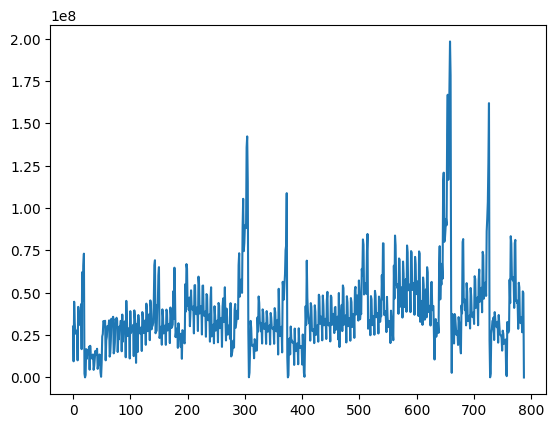

In [ ]:
df['NetAmount'].plot()

In [ ]:
new_column_names = {'Transdate': 'ds', 'NetAmount': 'y'}
df.rename(columns=new_column_names, inplace=True)

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()

In [ ]:
m = Prophet(interval_width=0.5,yearly_seasonality=2, daily_seasonality=False )


In [ ]:
m = Prophet(seasonality_mode='additive',yearly_seasonality=2, weekly_seasonality=False, daily_seasonality=False
,interval_width=0.5,
holidays_prior_scale=10,
changepoint_prior_scale=1,
seasonality_prior_scale=0.7,
changepoint_range = 0.95,
changepoints = ['2021-07-26','2021-08-20','2021-09-14','2021-10-10','2021-11-04','2021-11-29'
                ,'2021-12-24','2022-01-18','2022-02-12','2022-03-10','2022-04-04','2022-04-29'
                ,'2022-05-24','2022-06-18','2022-07-13','2022-08-08','2022-09-02','2022-09-27'
                ,'2022-10-22','2022-11-16','2022-12-11','2023-01-06','2023-01-31','2023-02-25'
                ,'2023-03-22']
)

In [ ]:
m.changepoints

25    2021-07-26
50    2021-08-20
75    2021-09-14
101   2021-10-10
126   2021-11-04
151   2021-11-29
176   2021-12-24
201   2022-01-18
226   2022-02-12
252   2022-03-10
277   2022-04-04
302   2022-04-29
327   2022-05-24
352   2022-06-18
377   2022-07-13
403   2022-08-08
428   2022-09-02
453   2022-09-27
478   2022-10-22
503   2022-11-16
528   2022-12-11
554   2023-01-06
579   2023-01-31
604   2023-02-25
629   2023-03-22
Name: ds, dtype: datetime64[ns]

In [ ]:
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/4d5un7sw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/hekg80e1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64987', 'data', 'file=/tmp/tmpx0mhjfwf/4d5un7sw.json', 'init=/tmp/tmpx0mhjfwf/hekg80e1.json', 'output', 'file=/tmp/tmpx0mhjfwf/prophet_modelp8z3hu86/prophet_model-20230906060206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:02:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:02:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=10,freq='D')
forecast = m.predict(future)
forecast.tail(30)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
768,2023-08-09,5.126231e+07,2.514781e+07,5.134370e+07,5.126231e+07,5.126231e+07,-1.362330e+07,-1.362330e+07,-1.362330e+07,-2.142288e+06,-2.142288e+06,-2.142288e+06,-1.148101e+07,-1.148101e+07,-1.148101e+07,0.0,0.0,0.0,3.763901e+07
769,2023-08-10,5.129692e+07,2.538501e+07,5.263963e+07,5.129692e+07,5.129692e+07,-1.069811e+07,-1.069811e+07,-1.069811e+07,7.620835e+05,7.620835e+05,7.620835e+05,-1.146020e+07,-1.146020e+07,-1.146020e+07,0.0,0.0,0.0,4.059880e+07
770,2023-08-11,5.133153e+07,1.528160e+07,4.142345e+07,5.133153e+07,5.133153e+07,-2.293690e+07,-2.293690e+07,-2.293690e+07,-1.150416e+07,-1.150416e+07,-1.150416e+07,-1.143275e+07,-1.143275e+07,-1.143275e+07,0.0,0.0,0.0,2.839462e+07
771,2023-08-12,5.136613e+07,3.784746e+07,6.456916e+07,5.136613e+07,5.136613e+07,3.457280e+05,3.457280e+05,3.457280e+05,1.174446e+07,1.174446e+07,1.174446e+07,-1.139873e+07,-1.139873e+07,-1.139873e+07,0.0,0.0,0.0,5.171186e+07
772,2023-08-13,5.140074e+07,3.441287e+07,6.150768e+07,5.140074e+07,5.140074e+07,-2.231484e+06,-2.231484e+06,-2.231484e+06,9.126743e+06,9.126743e+06,9.126743e+06,-1.135823e+07,-1.135823e+07,-1.135823e+07,0.0,0.0,0.0,4.916926e+07
773,2023-08-14,5.143535e+07,2.226853e+07,4.820596e+07,5.143535e+07,5.143535e+07,-1.595482e+07,-1.595482e+07,-1.595482e+07,-4.643503e+06,-4.643503e+06,-4.643503e+06,-1.131132e+07,-1.131132e+07,-1.131132e+07,0.0,0.0,0.0,3.548052e+07
774,2023-08-15,5.146995e+07,2.545031e+07,5.086700e+07,5.146995e+07,5.146995e+07,-1.460144e+07,-1.460144e+07,-1.460144e+07,-3.343338e+06,-3.343338e+06,-3.343338e+06,-1.125810e+07,-1.125810e+07,-1.125810e+07,0.0,0.0,0.0,3.686852e+07
775,2023-08-16,5.150456e+07,2.456449e+07,5.192286e+07,5.150456e+07,5.150456e+07,-1.334095e+07,-1.334095e+07,-1.334095e+07,-2.142288e+06,-2.142288e+06,-2.142288e+06,-1.119866e+07,-1.119866e+07,-1.119866e+07,0.0,0.0,0.0,3.816362e+07
776,2023-08-17,5.153917e+07,2.764745e+07,5.506769e+07,5.153917e+07,5.153917e+07,-1.037101e+07,-1.037101e+07,-1.037101e+07,7.620835e+05,7.620835e+05,7.620835e+05,-1.113310e+07,-1.113310e+07,-1.113310e+07,0.0,0.0,0.0,4.116816e+07
777,2023-08-18,5.157378e+07,1.756692e+07,4.408140e+07,5.157378e+07,5.157378e+07,-2.256567e+07,-2.256567e+07,-2.256567e+07,-1.150416e+07,-1.150416e+07,-1.150416e+07,-1.106152e+07,-1.106152e+07,-1.106152e+07,0.0,0.0,0.0,2.900810e+07


In [ ]:
col = ['ds' , 'yhat']

In [ ]:
res = forecast[col]

In [ ]:
res.drop('ds' , axis=1 )

,yhat
0,2.423208e+07
1,1.175120e+07
2,3.478989e+07
3,3.196714e+07
4,1.799689e+07
...,...
793,5.205314e+07
794,3.847109e+07
795,3.996287e+07
796,4.135880e+07


In [ ]:
res.to_csv('proph_pred2.csv', index = False, encoding='utf-8') # False: not include index

In [ ]:
listofpred = forecast['yhat'].values

In [ ]:
len(listofpred)

798

In [ ]:
for i in range(0,798):
  print('\n',listofpred[i])


 36678183.18268706

 23938070.96415382

 46478126.347963996

 43282914.0829516

 28247154.870157514

 28382265.009388655

 28273085.591413073

 29639320.93116966

 15876066.804397594

 37508488.07137105

 33543894.43471409

 17896376.802338757

 17592824.761422172

 17229246.11714974

 18531918.901990574

 4897763.462441102

 26848997.419528402

 23385321.5753101

 8408794.743208572

 8930209.862546861

 9525880.837545648

 11899355.991057236

 -577571.3127846196

 22590488.84742965

 20375442.925479718

 6651338.98966077

 8401487.755888797

 10175967.91384365

 13654011.635540787

 2185622.375446189

 26247452.42663161

 24796154.104129713

 11694330.465221547

 13917868.89349156

 16013541.795277327

 19661369.635343783

 8216101.264686443

 32162845.119018216

 30470074.378730953

 17015143.98444563

 18791117.195783734

 20363802.2148097

 23433511.774807535

 11375919.178055897

 34697063.17740534

 32385743.3344782

 18338461.46031455

 19565723.192185692

 20648614.77571635

 

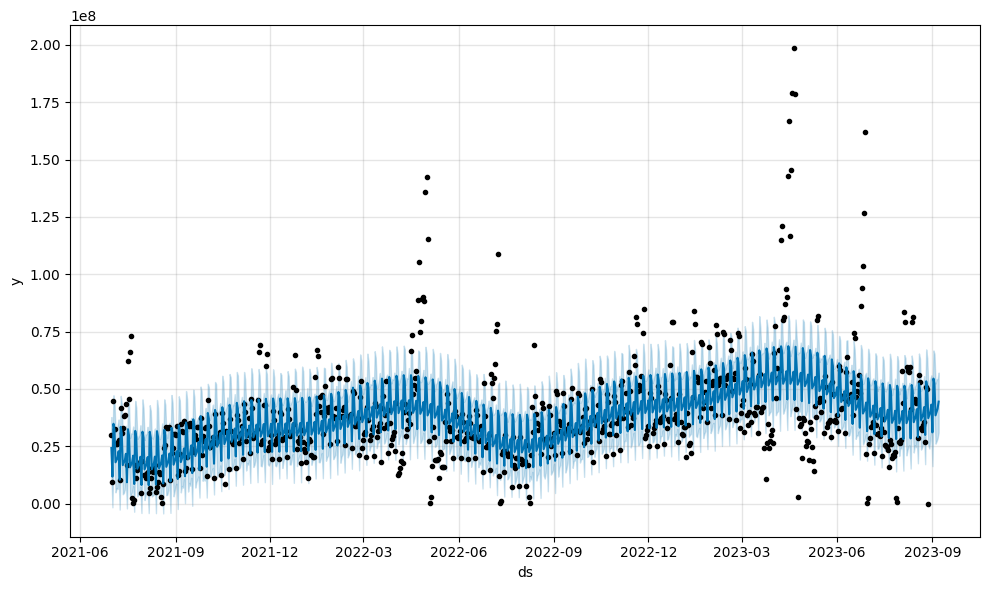

In [ ]:
plot1 = m.plot(forecast)


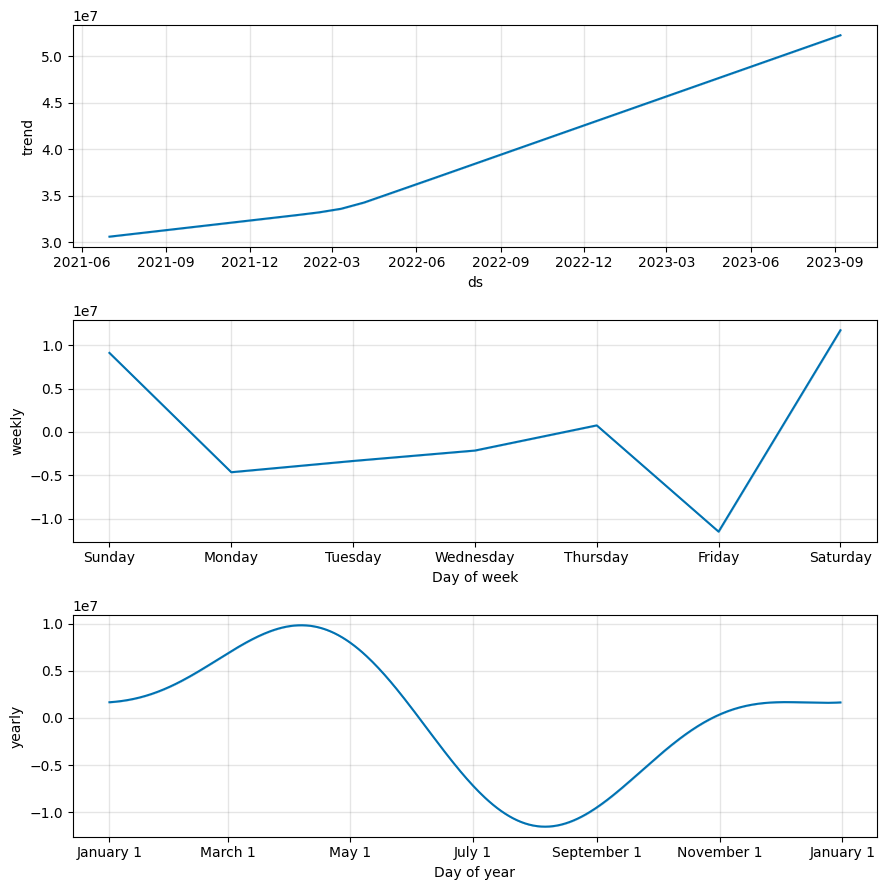

In [ ]:
plt2 = m.plot_components(forecast)

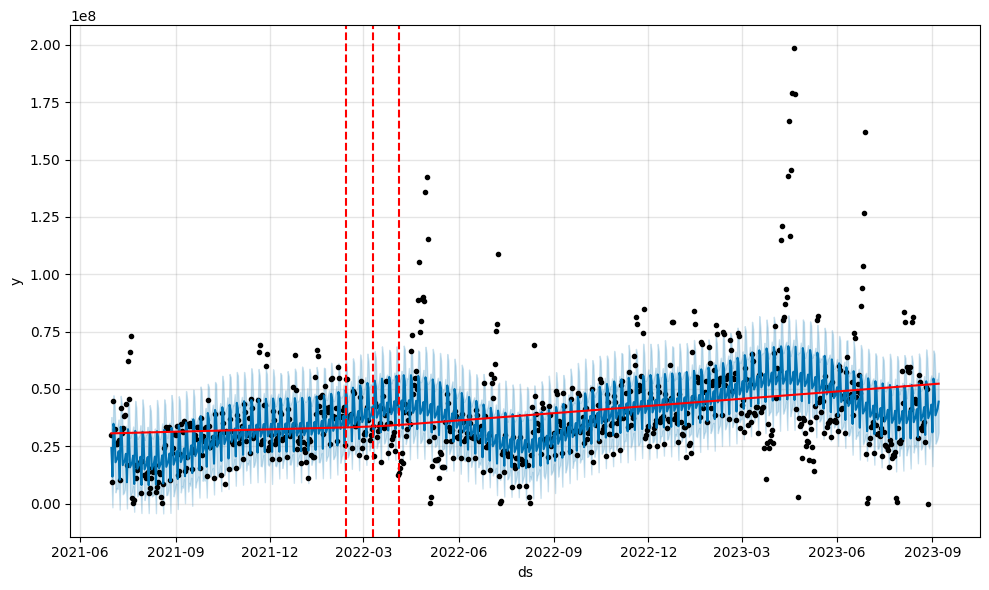

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/zfc0se_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/sb02234c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10818', 'data', 'file=/tmp/tmpx0mhjfwf/zfc0se_z.json', 'init=/tmp/tmpx0mhjfwf/sb02234c.json', 'output', 'file=/tmp/tmpx0mhjfwf/prophet_model45jt_ipq/prophet_model-20230906060723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


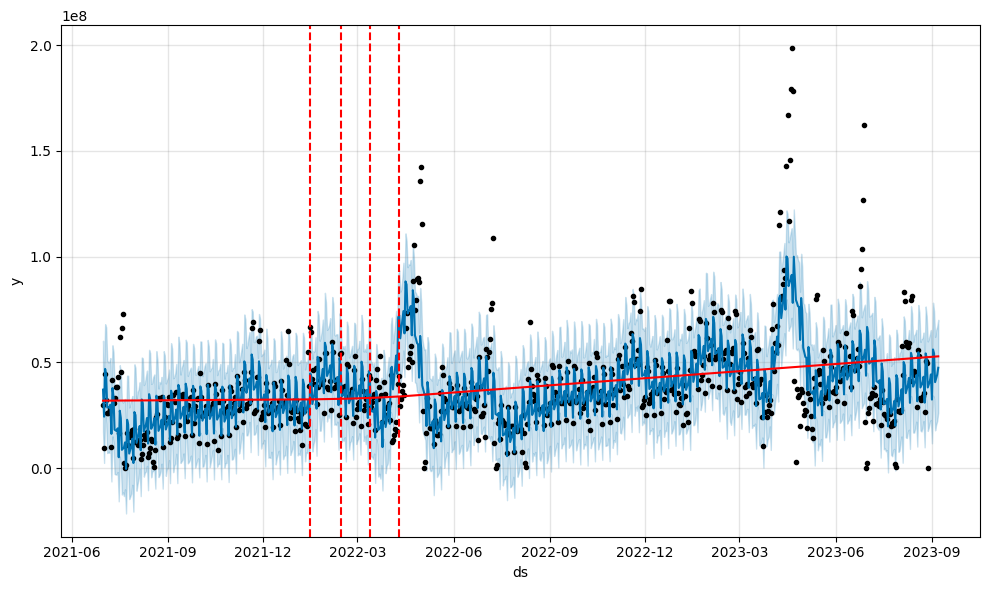

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/680eyb4z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/gziq0qtz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38994', 'data', 'file=/tmp/tmpx0mhjfwf/680eyb4z.json', 'init=/tmp/tmpx0mhjfwf/gziq0qtz.json', 'output', 'file=/tmp/tmpx0mhjfwf/prophet_modelpyxkw50n/prophet_model-20230906060724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


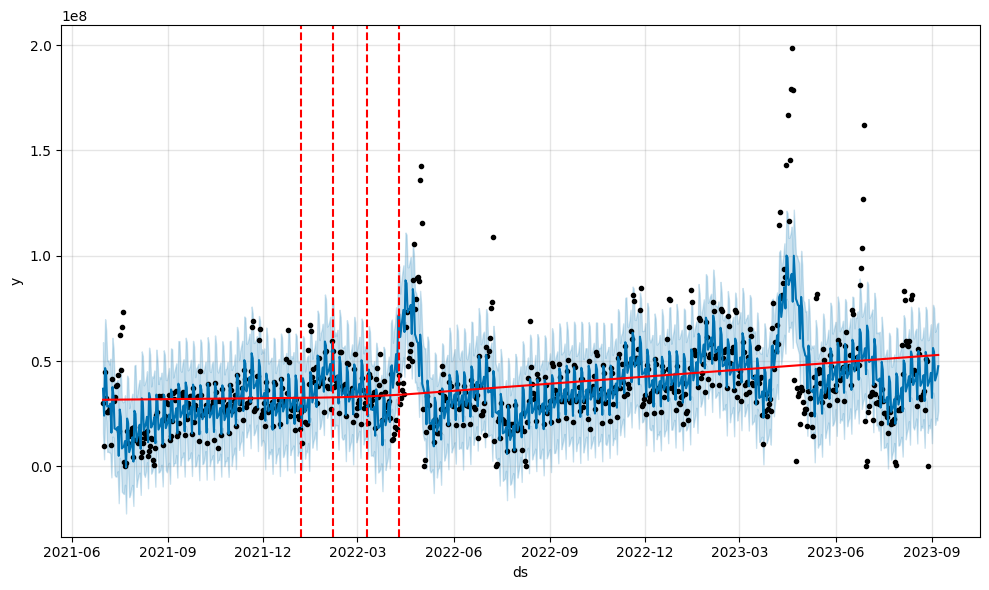

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/x728bfc4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/jgctdr7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84190', 'data', 'file=/tmp/tmpx0mhjfwf/x728bfc4.json', 'init=/tmp/tmpx0mhjfwf/jgctdr7e.json', 'output', 'file=/tmp/tmpx0mhjfwf/prophet_model3g8o_ulj/prophet_model-20230906060725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


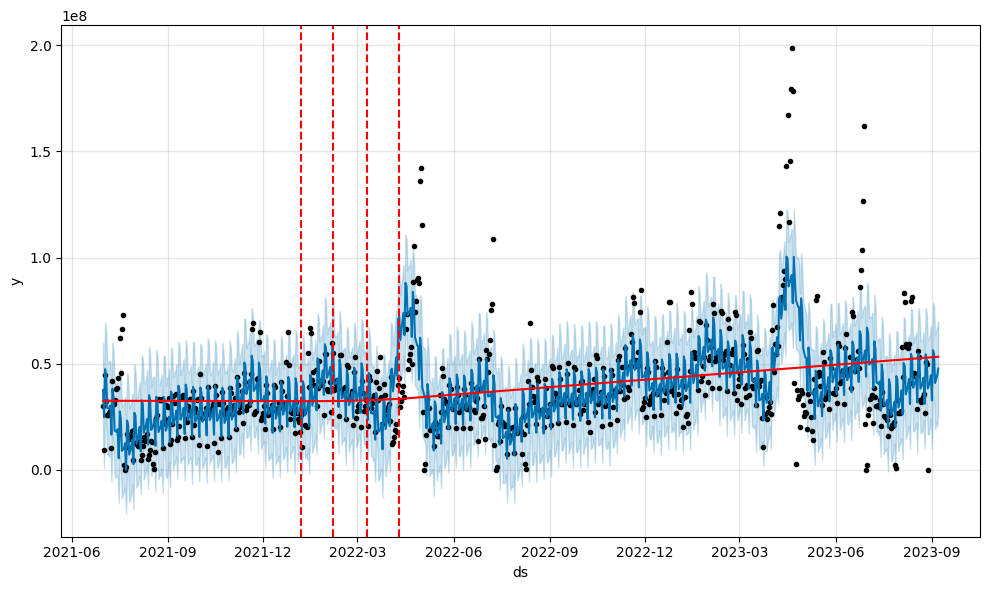

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/uaiqt7uy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0mhjfwf/t1ujbc6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11458', 'data', 'file=/tmp/tmpx0mhjfwf/uaiqt7uy.json', 'init=/tmp/tmpx0mhjfwf/t1ujbc6n.json', 'output', 'file=/tmp/tmpx0mhjfwf/prophet_model679zjybq/prophet_model-20230906060725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


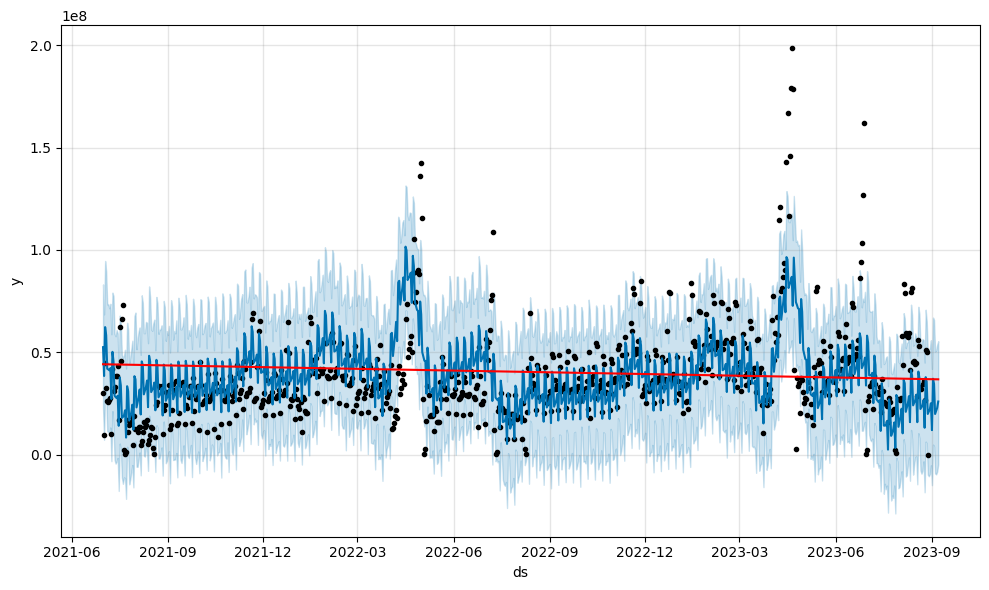

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)